# Google Playstore Applications Data Analysis and Visualization

Which is  ------------
the Most Installed App ? the Best Rated App ? the Costliest App ? the App with most Reviews ? the Category of the App ? the App with Big Size

Well my notebook has answers for all of the above mentioned questions in a visualized manner.

Get below and look into my kernel for Data cleaning and some interactive visualizations.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [3]:
import os
print(os.listdir("../input/google-play-store-apps"))

['googleplaystore.csv', 'license.txt', 'googleplaystore_user_reviews.csv']


In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [5]:
df =pd.read_csv('../input/google-play-store-apps/googleplaystore.csv')

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.shape

(10841, 13)

# Dealing with Missing values

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


Since the percentage of Null values are very low , lets drop those rows from our dataset

In [9]:

df.dropna(how ='any', inplace = True)

In [10]:
df.shape

(9360, 13)

we have reduced the size of the dataset which had null values (From 10841 to 9360)

In [11]:
df.isnull().sum().head()

App         0
Category    0
Rating      0
Reviews     0
Size        0
dtype: int64

# Data Cleaning

In [12]:
df.dtypes.value_counts()

object     12
float64     1
dtype: int64

We can observe that there are 12 coumns which are in str format , lets do some preprocessing

**1) Size**

In [13]:
df['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
506k                     1
957k                     1
164k                     1
411k                     1
442k                     1
Name: Size, Length: 413, dtype: int64

In [14]:
#A function to convert  Kb to Mb
def convert_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)
        return(x)
    elif 'k' in size:
        x = size[:-1]
        x = float(x)/1000
        return(x)
    else:
        return None

df['Size'] = df['Size'].map(convert_size)

#filling Size which had NA (Rows with Size == 'Varies with device' )

df.Size.fillna(method = 'ffill', inplace = True)

#('ffill method')propagates last valid observation forward to next valid

In [15]:
df.sort_values(by = 'Size').head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1532,Essential Resources,LIBRARIES_AND_DEMO,4.6,237,0.0085,"50,000+",Free,0,Everyone,Libraries & Demo,"September 27, 2017",1.02,7.1 and up


**2) Installs**

In [16]:
df['Installs'].value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [17]:
#Removing ',' and '+' from 'Installs' column
df["Installs"] = df["Installs"].str.replace("+","")
df["Installs"] = df["Installs"].str.replace(",","")
df["Installs"] = pd.to_numeric(df["Installs"])

In [18]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


**3) Reviews**

In [19]:
df['Reviews'].value_counts()

2          83
3          78
5          74
4          74
1          67
           ..
3158047     1
721         1
15693       1
4210        1
15426       1
Name: Reviews, Length: 5990, dtype: int64

In [20]:
df["Reviews"] = pd.to_numeric(df["Reviews"])

**4) Type**

In [21]:
df['Type'].value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

In [22]:
#Coverting 'Type' column into binary values as ('Free' == 0) and ('Paid' == 1)
def converttype(cost):
    if 'Free' in cost:
        return 0
    elif 'Paid' in cost:
        return 1
    else:
        return None
    
df['Type'] = df['Type'].map(converttype)

In [23]:
df['Type'].value_counts()

0    8715
1     645
Name: Type, dtype: int64

**5) Price**

In [24]:
df['Price'].value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$1.75         1
$13.99        1
$2.90         1
$379.99       1
$1.61         1
Name: Price, Length: 73, dtype: int64

In [25]:
#Removing '$' from 'Price' column
df["Price"] = df["Price"].str.replace("$","")
df["Price"] = pd.to_numeric(df["Price"])

In [26]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


**6) Last Updated**

In [27]:
df['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

Converting the data which is in string format to datetime format 

In [28]:
from datetime import datetime,date
dt=pd.to_datetime(df['Last Updated'])
dt.head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

Taking a difference between last updated date and today to simplify the data. It gives the number of days before the app has been last updated . 

In [29]:
df['Last Updated Days'] = dt.apply(lambda x:date.today()-datetime.date(x))
df['Last Updated Days'].head()

0   695 days
1   687 days
2   489 days
3   543 days
4   531 days
Name: Last Updated Days, dtype: timedelta64[ns]

In [30]:
df.drop(['Last Updated'],axis=1,inplace=True)

In [31]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated Days
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,695 days


**7) Genre**

In [32]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

The data is in the format Category;Subcategory. Lets divide the data into two columns, one as primary category and the other as secondary, using ; as separator.

In [33]:
sep = ';'
primary = df['Genres'].apply(lambda x: x.split(sep)[0])
df['Primary Genre']=primary
df['Primary Genre'].head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Primary Genre, dtype: object

In [34]:
primary = df['Genres'].apply(lambda x: x.split(sep)[-1])
primary.unique()
df['Secondary Genre']= primary
df['Secondary Genre'].head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: Secondary Genre, dtype: object

In [35]:
grouped = df.groupby(['Primary Genre','Secondary Genre'])
grouped.size().head()

Primary Genre  Secondary Genre   
Action         Action                358
               Action & Adventure     17
Adventure      Action & Adventure     13
               Adventure              73
               Brain Games             1
dtype: int64

In [36]:
df.drop(['Genres','Current Ver','Android Ver'],axis=1,inplace=True)

In [37]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated Days,Primary Genre,Secondary Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0,0.0,Everyone,695 days,Art & Design,Art & Design


# Analysis and Visualization

**Distibution of Free and Paid Apps**

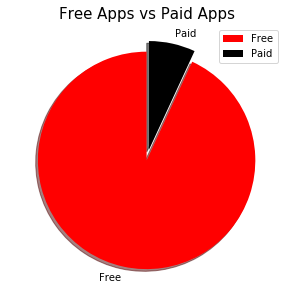

In [38]:
fig = plt.figure(figsize = (5,5))
labels = ['Free', 'Paid'] 
size = df['Type'].value_counts()
#colors = plt.cm.Wistia(np.linspace(0, 1, 5))
colors = ['r','k','y']
explode = [0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Free Apps vs Paid Apps', fontsize = 15)
plt.legend()
plt.show()

It's pretty clear that Paid google play Apps are very less in number . uff we are lucky :P

**Count of Apps in each Content Rating**

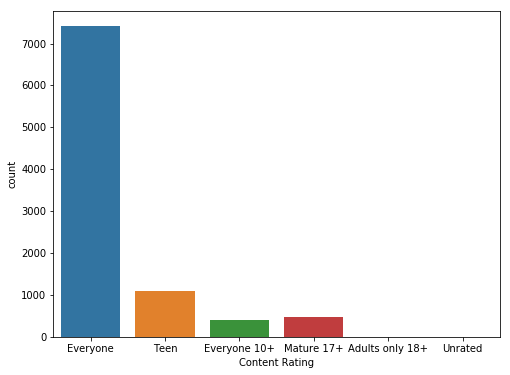

In [39]:
fig = plt.figure(figsize = (8,6))
sns.countplot(x = 'Content Rating' , data = df)

As expected Apps with Content Rating as 'Everyone' is more in number when compared to 'Adults Only 18+', 'Teen' and 'Mature 17+ 

**Count of Apps based on Type and Content Rating  **

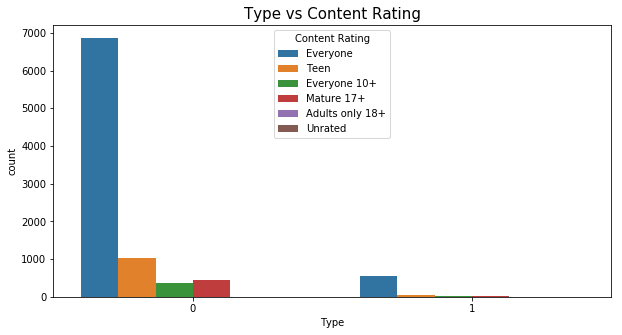

In [40]:
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Type' , hue = 'Content Rating' , data = df)
plt.title('Type vs Content Rating', fontsize = 15)
plt.show()

Another proof of Apps with Type - 'Paid' are very less in number . Every type of 'Content Rating' has one or more paid Apps.

**Number of Apps in each Category**

In [41]:
fig = plt.figure(figsize = (15,15))
pos = df.groupby(by='Category').size().reset_index()
pos.columns = ['Category','Count']

labels = pos['Category']
values = pos['Count']
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label', textinfo='percent', textfont_size=10,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Distribution of Apps based on Category")
fig.show()

<Figure size 1080x1080 with 0 Axes>

Almost 30% of Apps are of the 'FAMILY' and 'GAME Category . 

**Applications with maximum number of installations with good rating**

In [42]:
MostInstalled = df.sort_values(by = 'Installs' , ascending = False).head(20)
BestRating = MostInstalled.sort_values(by = 'Rating' , ascending = False).head(10)

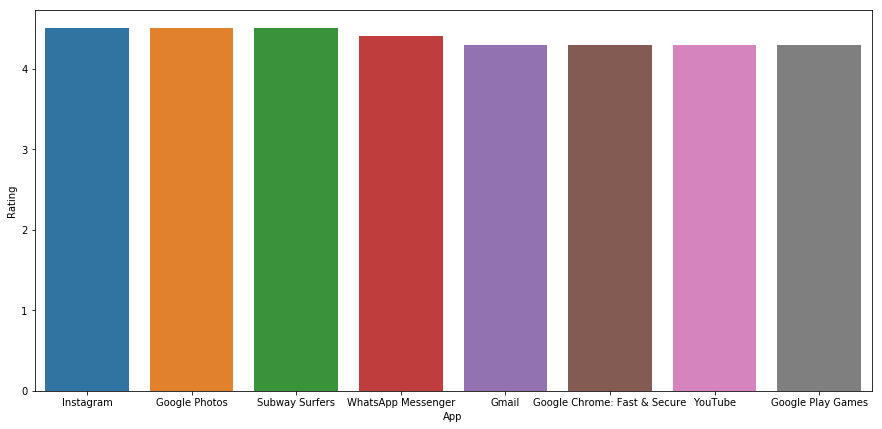

In [43]:
fig = plt.figure(figsize = (15,7))
sns.barplot(x='App',y='Rating' , data = BestRating)

Popular applications such as Instagram , WhatsApp , Gmail , YouTube tops the list when number of installations with best Rating is taken into account.

**Applications with maximum number of reviews**

In [44]:
MaxReviews = df.sort_values(by = 'Reviews',ascending = False).head(10)

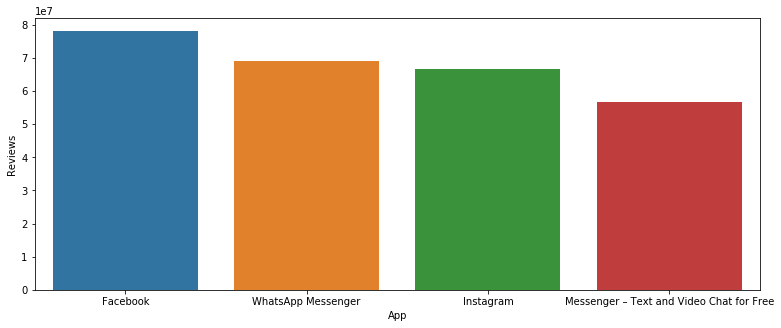

In [45]:
fig = plt.figure(figsize = (13,5))
sns.barplot(x='App',y='Reviews' , data = MaxReviews)

Applications with most number of Reviews are Facebook , WhatsApp and Instagram etc .,. Not surprising at all :P

**Rating vs Reviews**

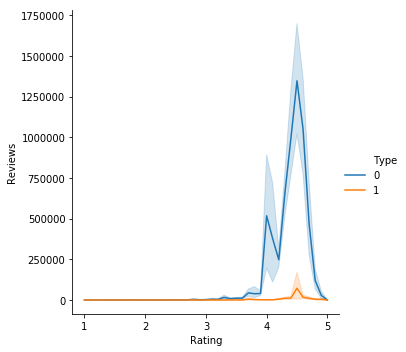

In [46]:
sns.relplot(x="Rating", y="Reviews", hue = 'Type' , kind = 'line' , data=df)

For Apps with Type - 'Free' ( Number of Reviews increases when the Rating of the Apps are Good )

For Apps with Type - 'Paid' ( Number of Reviews is almost 0 for all the Apps , except for which has some good Rating . This shows people only use paid Apps when their Rating is Good)


**Rating vs Installs**

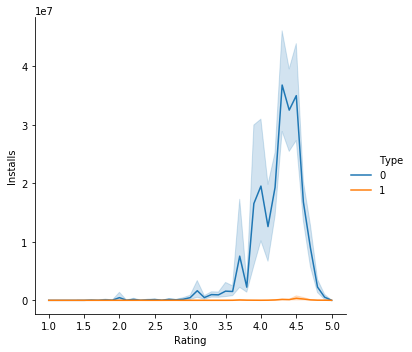

In [47]:
sns.relplot(x="Rating", y="Installs", hue = 'Type' , kind = 'line' , data=df)

For Apps with Type - 'Free' ( Although the App is free of cost , much Apps arent installed when their Rating is less than 3)

For Apps with Type - 'Paid' ( It shows People avoid using Paid Apps , a few Apps have been installed when the Rating is more than 4.5)

**Applications with Large Size and Worst Rating**

In [48]:
MaxSize = df.sort_values(by = 'Size' , ascending = False).head(1000)
BestRatingSize = MaxSize.sort_values(by = 'Rating').head()

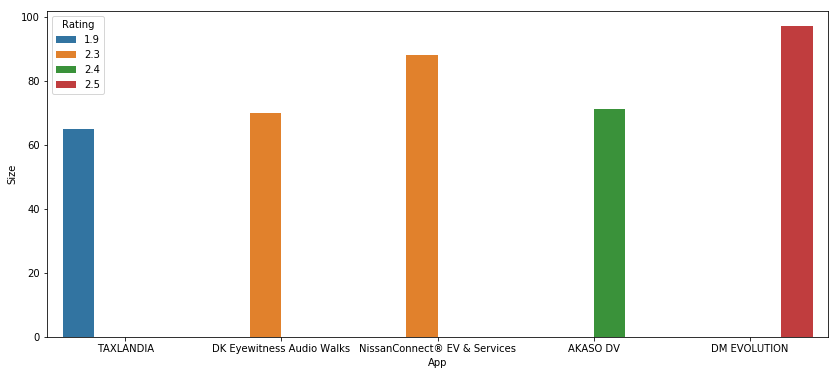

In [49]:
fig = plt.figure(figsize = (14,6))
sns.barplot(x='App',y='Size',hue = 'Rating' , data = BestRatingSize)

The above Apps are the ones which are big in Size and has a very bad user Ratings

**Relationship between Primary and Secondary Genre categories**

In [50]:
GenreTable = pd.crosstab(index=df["Primary Genre"],columns=df["Secondary Genre"])
GenreTable.head()

Secondary Genre,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
Primary Genre,,,,,,,,,,,,,,,,,,,,,
Action,358,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,13,73,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Arcade,0,15,0,207,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Art & Design,0,0,0,0,55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auto & Vehicles,0,0,0,0,0,73,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


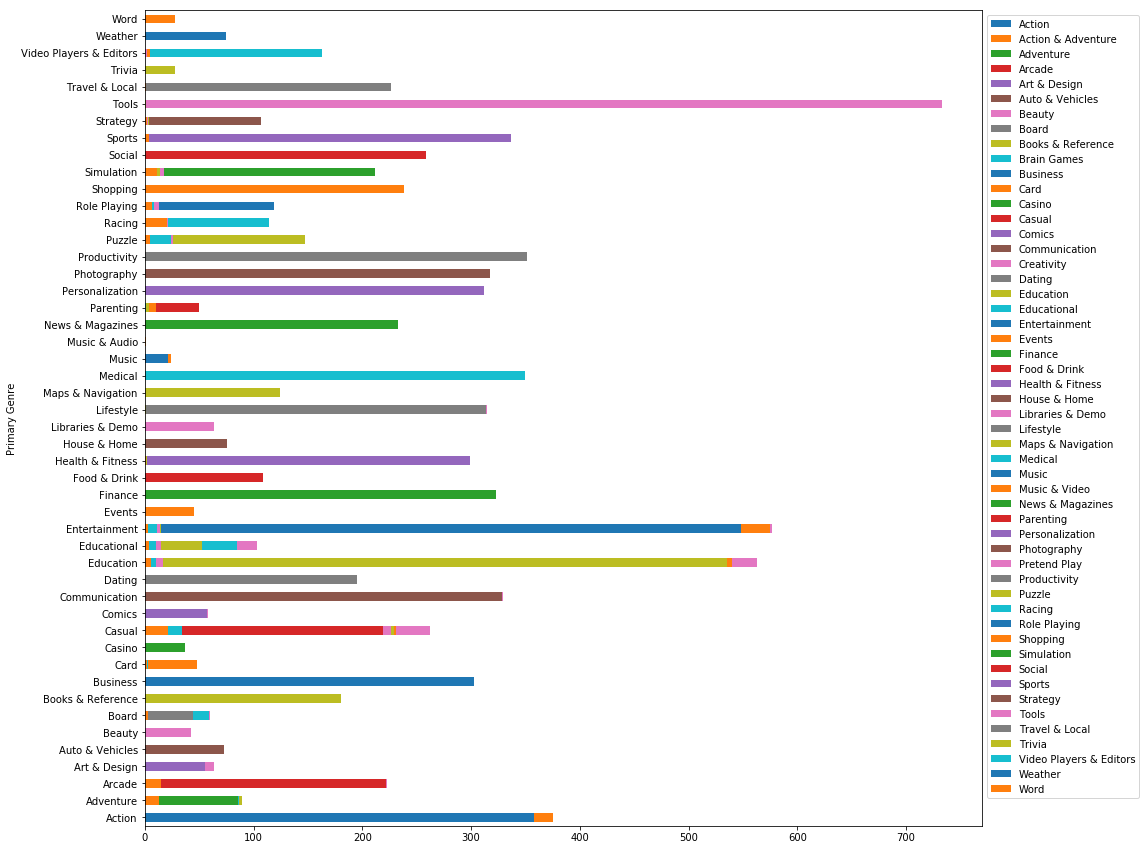

In [51]:
GenreTable.plot(kind="barh", figsize=(15,15),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))

The above plot shows the distribution of Secondary Genre in each Primary Genre

**The Most Outdated Applications in terms of Last Updated Days**

In [52]:
days = df.sort_values(by = 'Last Updated Days' , ascending = False).head(5)

Text(0.5, 0.98, 'Outdated Apps')

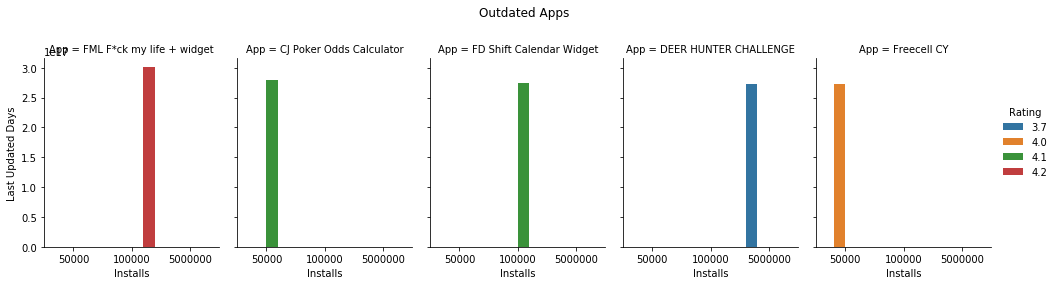

In [53]:
g = sns.catplot(x="Installs", y="Last Updated Days",hue="Rating", col="App",data=days, kind="bar",height=4, aspect=.7)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Outdated Apps')

Although the App named "FML F.ck my life" is the most outdated App. It has a good rating and number of Installs .So the Last Updated Days doesnt affect the Rating or installation of an Application

**Analysis of Apps on the Category 'Social' and 'Game'**

In [54]:
Social = df[(df['Category'] == 'SOCIAL') | (df['Category'] == 'GAME')]
SocialMaxReviews = Social.sort_values(by = 'Reviews' , ascending = False).head(10)

Text(0.5, 0.98, 'Top "Social" and "Game" Category Apps based on their Reviews')

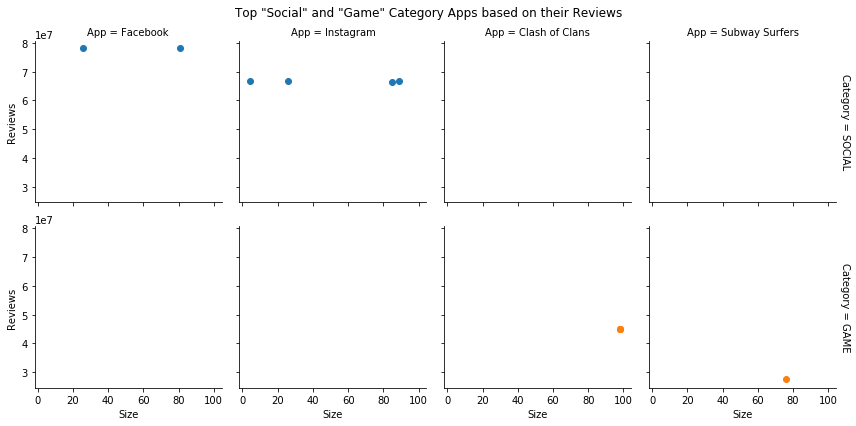

In [55]:
g = sns.FacetGrid(data = SocialMaxReviews, row = 'Category' , col  = 'App',hue = 'Content Rating' , margin_titles = True)
g = (g.map(plt.scatter , "Size" , "Reviews"))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Top "Social" and "Game" Category Apps based on their Reviews')

We can observe that there are same Apps which has repeated.

In SOCIAL Category , the plot show us that Facebook has most number of reviews in both small size and large size Application and Instagram has 4 different file sizes and it follows facebook in terms of most number of reviews .

In GAME Category , Clash of Clans has 3 different applications of the same sizes which tops the list in terms of most number of Reviews followed by Subway Surfers 

**High Price App with worst Rating**

In [56]:
PaidApp = df[df['Type'] == 1]
CostlyApp = PaidApp.sort_values(by = 'Price' , ascending = False).head(50)
CostlyAppWorstRating = CostlyApp.sort_values(by = 'Rating').head()

Text(0.5, 0.98, 'High priced Apps with worst Rating')

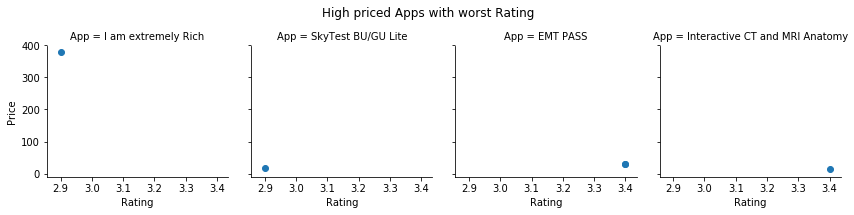

In [57]:
g = sns.FacetGrid(data = CostlyAppWorstRating, col  = 'App')
g = (g.map(plt.scatter , "Rating" , "Price"))
plt.subplots_adjust(top=0.8)
g.fig.suptitle('High priced Apps with worst Rating')

The application named 'I am extremely Rich' is the most overpriced Application with worst ever user Rating (Below 3)

**Attributes distribution of Apps based on their Content Rating**

Text(0.5, 0.98, 'Special Attributes distribution of Apps based on their Content Rating')

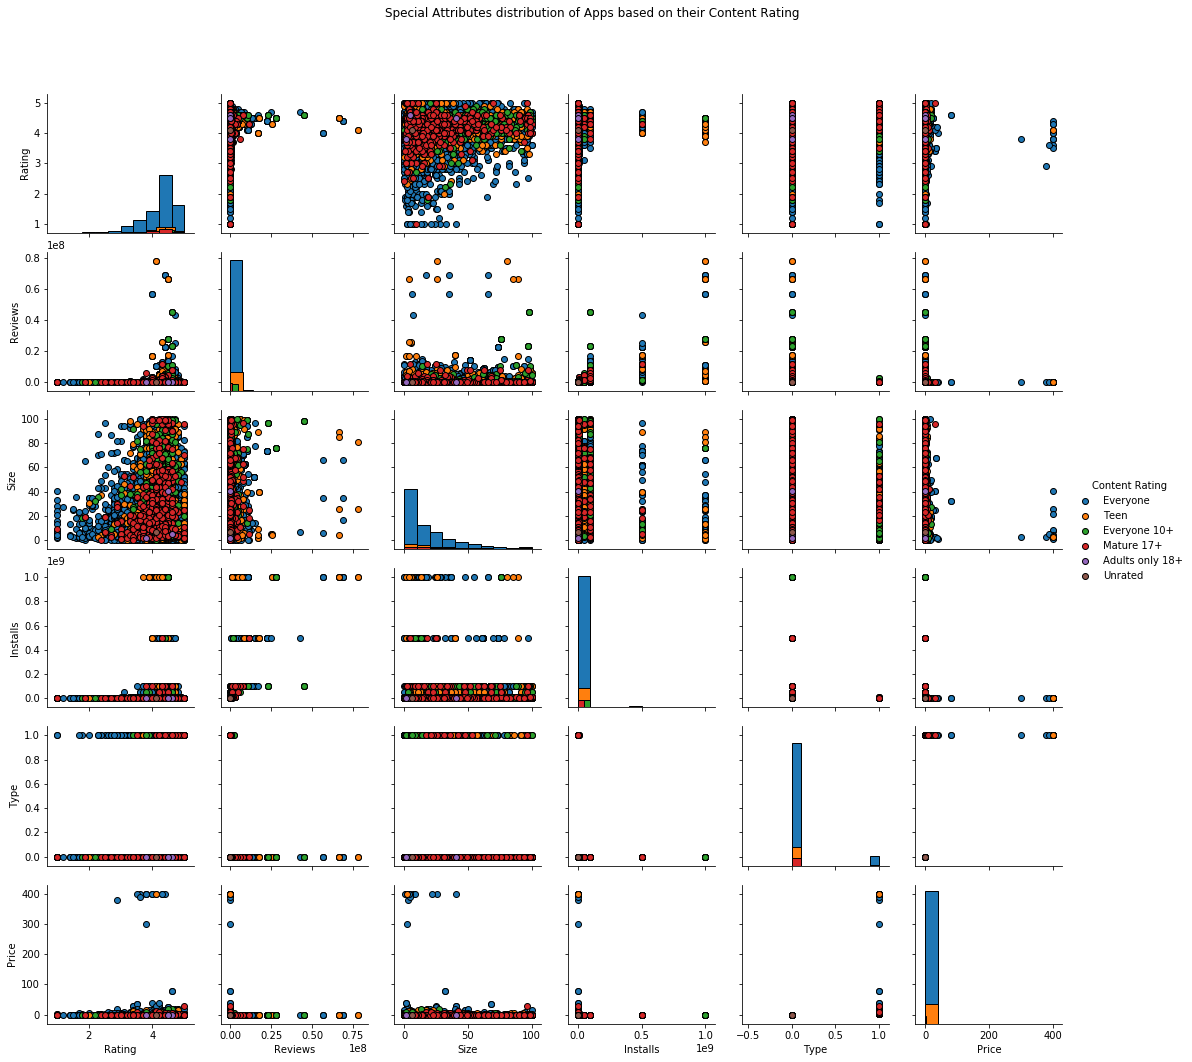

In [58]:
g = sns.PairGrid(df , hue = 'Content Rating')
g.map_diag(plt.hist,edgecolor = 'k')
g.map_offdiag(plt.scatter,edgecolor = 'k')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Special Attributes distribution of Apps based on their Content Rating')

The above plot shows that 
* There are very few Paid Apps which are having Rating below 3
* Hardly few Reviews and Installations for Paid Apps 
* Small sized Apps are having the maximum number of Installations
* Best Rated Apps are having the maximum number of Reviews

# The End

Please do hit the upvote button if you liked the kernel . 

Thanks for your time:)